

# PyCaret Binary Classification 

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


In [ ]:
!pip install pycaret

In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

# Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. 

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [5]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8046,0.5602,0.7208,0.6279,0.4641,0.4736,1.1680
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0130
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0120
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.0930
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0110
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.0550
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0420
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.0870
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0140
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.0930


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

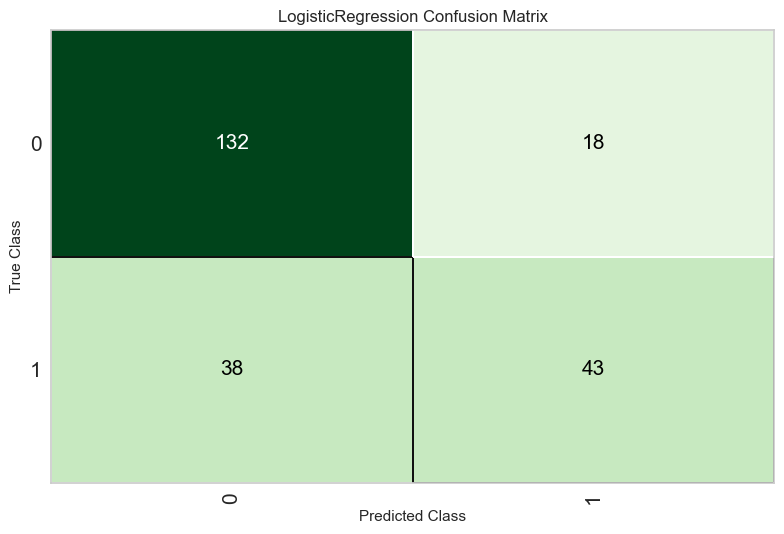

In [9]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

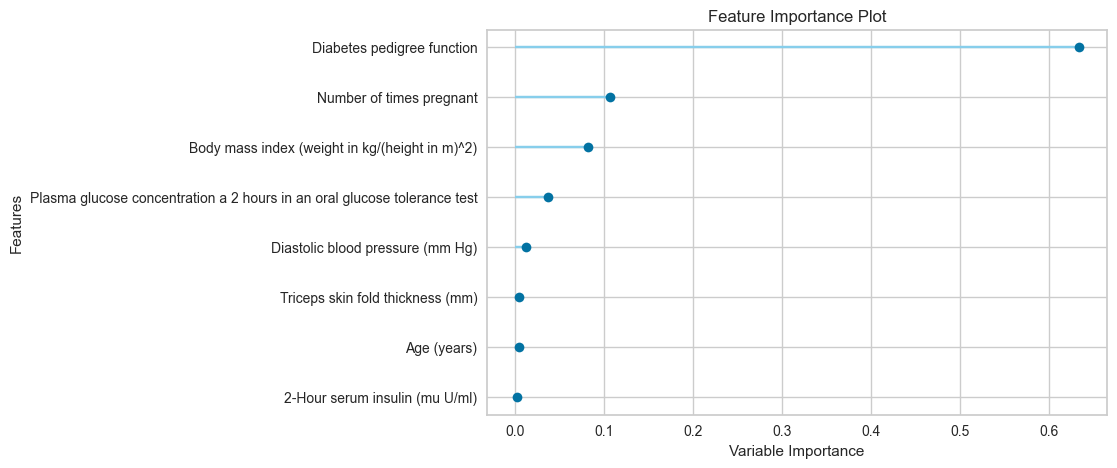

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [105]:
# check docstring to see available plots 
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [15]:
# show predictions df
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
537,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
538,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
539,2,90,70,17,0,27.299999,0.085,22,0,0,0.9393
540,2,105,58,40,94,34.900002,0.225,25,0,0,0.7998
541,11,138,76,0,0,33.200001,0.420,35,0,1,0.6391


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glu...
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('trained_model',
                  Lo

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glu...
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#Detailed function-by-function overview

## Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
# init setup function
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [29]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc',  'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.1140
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.0680
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.0910
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1380
dt,Decision Tree Classifier,0.6928,0.6512,0.5137,0.5636,0.5328,0.3070,0.3098,1.2720


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [31]:
compare_tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,0.120
catboost,CatBoost Classifier,0.7410,0.7994,0.5278,0.6630,0.5851,0.4005,0.4078,0.041
gbc,Gradient Boosting Classifier,0.7373,0.7920,0.5550,0.6445,0.5931,0.4013,0.4059,0.078
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.130
lightgbm,Light Gradient Boosting Machine,0.7113,0.7653,0.5181,0.6036,0.5533,0.3427,0.3479,0.046
dt,Decision Tree Classifier,0.6947,0.6526,0.5137,0.5665,0.5343,0.3103,0.3130,0.036
xgboost,Extreme Gradient Boosting,0.6853,0.7522,0.4912,0.5620,0.5216,0.2887,0.2922,0.042


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [31]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0130
lr,Logistic Regression,0.7689,0.8046,0.5602,0.7208,0.6279,0.4641,0.4736,0.0230
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.0710
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0140
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0140
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1720
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.1260
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0160
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0540
dt,Decision Tree Classifier,0.6928,0.6512,0.5137,0.5636,0.5328,0.3070,0.3098,0.0140


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

In [34]:
# list of top 3 models by Recall
best_recall_models_top3

[GaussianNB(priors=None, var_smoothing=1e-09),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [35]:
# help(compare_models)

## Set Custom Metrics

In [36]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000002E242711280>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000002E24270B0D0>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000002E242711...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000002E242711...,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [37]:
# create a custom function
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

Name                                                  Custom Metric
Display Name                                          Custom Metric
Score Function       <function custom_metric at 0x000002E24B0EA430>
Scorer                                   make_scorer(custom_metric)
Target                                                         pred
Args                                                             {}
Greater is Better                                              True
Multiclass                                                     True
Custom                                                         True
Name: custom_metric, dtype: object

In [38]:
# now let's run compare_models again
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
ridge,Ridge Classifier,0.7708,0.0000,0.5392,0.7353,0.6203,0.4618,0.4744,991.5000,0.0340
lr,Logistic Regression,0.7689,0.8068,0.4959,0.7614,0.5968,0.4453,0.4673,915.0000,0.0390
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,1019.0000,0.0470
svm,SVM - Linear Kernel,0.7521,0.0000,0.5070,0.7363,0.5796,0.4154,0.4398,929.5000,0.0330
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,976.0000,0.1230
nb,Naive Bayes,0.7427,0.7957,0.5702,0.6543,0.6043,0.4156,0.4215,1041.0000,0.0410
catboost,CatBoost Classifier,0.7410,0.7994,0.5278,0.6630,0.5851,0.4005,0.4078,964.5000,0.0400
gbc,Gradient Boosting Classifier,0.7373,0.7920,0.5550,0.6445,0.5931,0.4013,0.4059,1011.0000,0.0720
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,963.5000,0.0690
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,904.5000,0.1370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=123, solver='auto', tol=0.001)

In [39]:
# remove custom metric
remove_metric('custom_metric')

##  Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [32]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='diabetes_experiment')

,Description,Value
0,Session id,1140
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


2023/09/29 22:55:13 INFO mlflow.tracking.fluent: Experiment with name 'diabetes_experiment' does not exist. Creating a new experiment.


In [12]:
# compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8046,0.5602,0.7208,0.6279,0.4641,0.4736,1.3590
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0160
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0140
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.1170
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0140
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.0670
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0550
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.0970
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0150
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1510


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [34]:
# start mlflow server on localhost:5000
!mlflow ui

^C


By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [43]:
# help(setup)

## Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [44]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
# train knn regression with default fold=10
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8293,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.6852,0.7549,0.4737,0.5625,0.5143,0.2839,0.2862
2,0.7222,0.7962,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.6667,0.6165,0.4211,0.5333,0.4706,0.2322,0.2357
4,0.8148,0.8744,0.6316,0.8000,0.7059,0.5735,0.5820
5,0.6296,0.6271,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6111,0.6248,0.4737,0.4500,0.4615,0.1575,0.1576
7,0.7736,0.7937,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6944,0.5556,0.5000,0.5263,0.2628,0.2636


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [46]:
knn_results = pull()
print(type(knn_results))
knn_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9023,0.5789,0.8462,0.6875,0.5624,0.5828
1,0.8333,0.7970,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.8519,0.9383,0.6316,0.9231,0.7500,0.6499,0.6736
3,0.7222,0.7759,0.4211,0.6667,0.5161,0.3350,0.3524
4,0.8333,0.9083,0.5789,0.9167,0.7097,0.6010,0.6322
5,0.6852,0.6737,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7820,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7547,0.8460,0.3333,0.8571,0.4800,0.3579,0.4263
8,0.7358,0.6952,0.4444,0.6667,0.5333,0.3592,0.3736


In [47]:
# train logistic regression with fold=3
knn_model = create_model('knn', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8101,0.8526,0.5714,0.8372,0.6792,0.5510,0.5713
1,0.7486,0.7921,0.5000,0.6889,0.5794,0.4065,0.4172
2,0.7486,0.7804,0.4194,0.7429,0.5361,0.3815,0.4108
Mean,0.7691,0.8084,0.4969,0.7563,0.5983,0.4464,0.4664
Std,0.0290,0.0317,0.0621,0.0613,0.0599,0.0747,0.0742


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8872,0.4737,0.9000,0.6207,0.4992,0.5472
1,0.8148,0.8030,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.8519,0.9353,0.5789,1.0000,0.7333,0.6406,0.6865
3,0.7037,0.7684,0.3684,0.6364,0.4667,0.2812,0.3013
4,0.8519,0.9038,0.5789,1.0000,0.7333,0.6406,0.6865
5,0.6852,0.6737,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7624,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7547,0.8302,0.3333,0.8571,0.4800,0.3579,0.4263
8,0.7358,0.6952,0.3333,0.7500,0.4615,0.3193,0.3654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# help(create_model)

## Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [16]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
2,0.7407,0.7038,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.5926,0.5053,0.2105,0.3636,0.2667,0.0116,0.0125
4,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242,0.5259
5,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6296,0.5699,0.3684,0.4667,0.4118,0.1469,0.1491
7,0.8302,0.7770,0.6111,0.8462,0.7097,0.5940,0.6098
8,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt,optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.8135,0.6842,0.8667,0.7647,0.6588,0.6686
1,0.7593,0.6940,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.7593,0.7782,0.8421,0.6154,0.7111,0.5132,0.5318
3,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8333,0.7632,0.5263,1.0000,0.6897,0.5902,0.6470
5,0.6296,0.5820,0.4211,0.4706,0.4444,0.1680,0.1685
6,0.7222,0.6654,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7358,0.6246,0.2778,0.8333,0.4167,0.2973,0.3725
8,0.6604,0.5675,0.2778,0.5000,0.3571,0.1512,0.1633


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [19]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [47]:
# define tuning grid
params = {'max_depth' : [2, 6, 10],
          "max_features": [4,6],
          "min_samples_leaf": [2,4]}

# tune model with custom grid and metric = F1
tuned_dt, tunner = tune_model(dt, custom_grid = params, optimize = 'F1',return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7278,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.7778,0.8338,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.7037,0.7368,0.4211,0.6154,0.5000,0.2998,0.3107
3,0.7593,0.7812,0.4737,0.7500,0.5806,0.4236,0.4456
4,0.7222,0.7459,0.5789,0.6111,0.5946,0.3836,0.3839
5,0.6852,0.7188,0.5789,0.5500,0.5641,0.3180,0.3182
6,0.6852,0.7526,0.5789,0.5500,0.5641,0.3180,0.3182
7,0.7547,0.6992,0.5556,0.6667,0.6061,0.4301,0.4339
8,0.7925,0.8627,0.6667,0.7059,0.6857,0.5310,0.5315


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
type(tunner)

sklearn.model_selection._search.RandomizedSearchCV

In [49]:
print(tunner)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Number '
                                                                          'of '
                                                                          'times '
                                                                          'pregnant',
                                                                          'Plasma '
                                                                          'glucose '
                                                                          'concentration '
                                                                       

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [60]:
# help(tune_model)

## Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

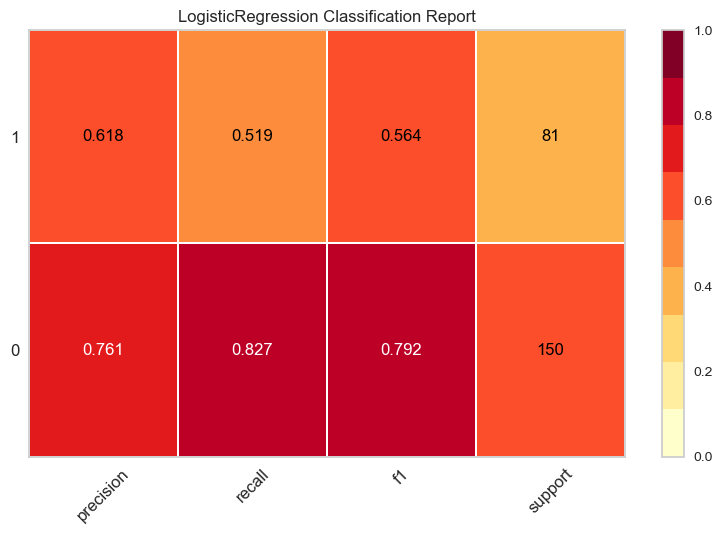

In [50]:
# plot class report
plot_model(best, plot = 'class_report')

## Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [73]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8376,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.7593,0.7865,0.7368,0.6364,0.6829,0.4906,0.4940
2,0.6667,0.8301,0.4211,0.5333,0.4706,0.2322,0.2357
3,0.6852,0.7639,0.5263,0.5556,0.5405,0.3014,0.3016
4,0.7778,0.8406,0.6842,0.6842,0.6842,0.5128,0.5128
5,0.6481,0.6887,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.7338,0.5263,0.6667,0.5882,0.4028,0.4088
7,0.8491,0.8603,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.6604,0.6952,0.5000,0.5000,0.5000,0.2429,0.2429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

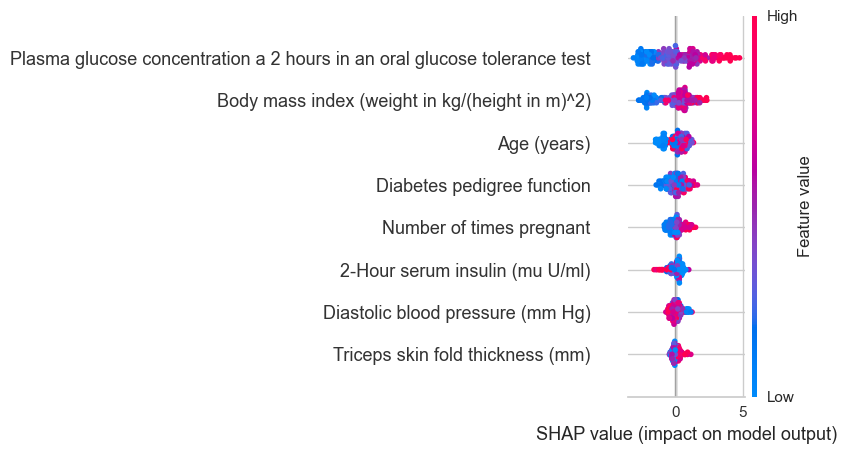

In [74]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

## Create App
This function creates a basic gradio app for inference.

In [12]:
!pip install gradio

     ---------------------------------------- 20.2/20.2 MB 8.6 MB/s eta 0:00:00
     -------------------------------------- 520.6/520.6 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 75.7/75.7 kB 4.4 MB/s eta 0:00:00
     -------------------------------------- 295.0/295.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 124.7/124.7 kB 7.2 MB/s eta 0:00:00
     -------------------------------------- 298.4/298.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB ? eta 0:00:00
     ---------------------------------------- 76.0/76.0 kB 4.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5601 sha256=5f01b575e7b4e7b19e8d3f4ed68216588d9ea14f73add9eb7d617154ebd03789
  Stored in directory: c:\users\nilay\appdata\local\pip\cache\wheels\25\a7\dd\c513d5a67b9610660774187483d20314b63e406d

In [20]:
# create gradio app
create_app(best)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [21]:
import gradio as gr
def predict_charges(age, bmi,sex,smoker,region,children):
    return "done"

sex = gr.inputs.Radio(['female', 'male'], label="sex")
smoker = gr.inputs.Radio(['no', 'yes'], label="smoker")
children = gr.inputs.Radio([2, 3, 1, 4, 5, 0], label="children")
region = gr.inputs.Radio(['northeast', 'southeast', 'northwest', 'southwest'], label="region")
age = gr.inputs.Slider(minimum=15, maximum=75, default=16, label="age")
bmi = gr.inputs.Slider(minimum=15, maximum=60, default=16, label="bmi")

gr.Interface(predict_charges, inputs=[age, bmi,sex,smoker,region,children], 
 outputs="label",
 title="Medical Insurance Cost Prediction",
 capture_session=True,
 live=True).launch(share=True);

Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://a803b57f5a827757bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
